In [48]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

In [112]:
def naive_sm(T, P):

    n, m = len(T), len(P)
    
    found = []

    for s in range(n-m+1):            

        sub_T = T[s:s+m]    # substring of T
        
        j = 0

        while j < m:
            if sub_T[j] != P[j]:
                break
            j += 1

        if j == m:
            found.append(s)        
        
    return found

def rabin_karp_sm(T, P, d, q):

    n, m, d, q = len(T), len(P), d, q
    
    found = []
    h = 1
    p = 0
    t = 0
    
    for i in range(m-1):
        h = (h*d) % q

    for i in range(m):
        p = (d*p + ord(P[i])) % q
        t = (d*t + ord(T[i])) % q

    for i in range(n-m+1):
        if p == t:  
                      
            for j in range(m):
                if T[i+j] != P[j]:
                    break

            j += 1
            if j == m:
                found.append(i)                

        if i < n-m:
            t = (d*(t-ord(T[i])*h) + ord(T[i+m])) % q

            if t < 0:
                t = t+q

    return found

In [113]:
T = 'aaabdbcadbeffdhgedbaajkjadcheqrtuadbhciadb'
P = 'adb'
d = 10
q = 13

print(f'Pattern found at index: {naive_sm(T, P)}')
print(f'Pattern found at index: {rabin_karp_sm(T, P, d, q)}')

Pattern found at index: [7, 33, 39]
Pattern found at index: [7, 33, 39]


In [87]:
def linear(x, a, b):
    return a * x + b

def quad(x, a, b): 
    return a * x**2 + b

def cube(x, a, b):
    return a * x**3 + b

def nlogn(a, x, b):
    return a * x * np.log(x) + b

### Naive String Matching

In [114]:
nums = np.random.randint(1, 5, 2000)
total_time = np.zeros(2000)

for i in range(5):
    times = []

    for j in tqdm(range(2000)):
        # start time
        start = time.time()

        naive_sm(T, P)

        # end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time / 5

100%|██████████| 2000/2000 [00:00<00:00, 54143.11it/s]


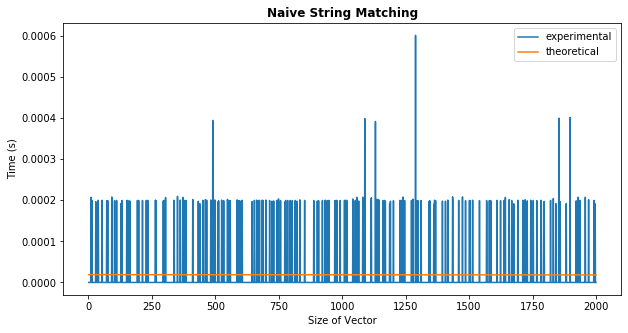

In [115]:
# plot graph
x = np.arange(1,2001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='experimental')
props = curve_fit(linear, x, mean_time)
plt.plot(x, linear(x, *props[0]), label='theoretical')
plt.title('Naive String Matching', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Size of Vector')
plt.legend()
plt.show()

### Rabin Karp String Matching

In [116]:
nums = np.random.randint(1, 5, 2000)
total_time = np.zeros(2000)

for i in range(5):
    times = []

    for j in tqdm(range(2000)):
        # start time
        start = time.time()

        rabin_karp_sm(T, P, d, q)

        # end time
        end = time.time() - start
        times.append(end)

    total_time += np.array(times)

mean_time = total_time / 5

100%|██████████| 2000/2000 [00:00<00:00, 36454.77it/s]


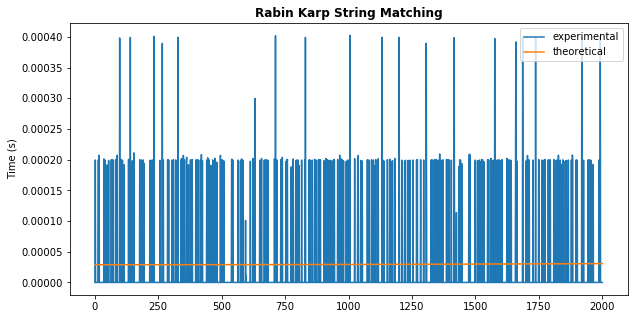

In [117]:
# plot graph
x = np.arange(1,2001)

plt.figure(figsize=(10,5))
plt.plot(x, mean_time, label='experimental')
props = curve_fit(quad, x, mean_time)
plt.plot(x, quad(x, *props[0]), label='theoretical')
plt.title('Rabin Karp String Matching', fontweight='bold')
plt.ylabel('Time (s)')
plt.legend()
plt.show()